### 01 Import Libraries

In [1]:
# import Libraries
import pandas as pd
import pandas_profiling
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import chardet
import fuzzywuzzy

### 02 Import Data

In [3]:
df_opcm=pd.read_pickle(r"C:\Users\drmat\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_merged4-9.pkl")

In [4]:
df_opcm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641279 entries, 0 to 32641278
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float64
 1   user_id                 float64
 2   order_number            float64
 3   order_day_of_week       float64
 4   order_hour_of_day       float64
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                float64
 11  department_id           float64
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest days            object 
 15  busiest_period_of_day   object 
 16  max_order               float64
 17  loyalty_flag            object 
 18  average_price           float64
 19  spending_flag           object 
 20  median_days             float64
 21  order_frequency_flag    objec

In [8]:
df_dep=pd.read_csv(r"C:\Users\drmat\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\departments_wrangled.csv", index_col=False)

In [11]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [12]:
df_dep.rename(columns={df_dep.columns[0]:'department_id'},inplace=True)

In [13]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [14]:
df = df_opcm.merge(df_dep, on=['department_id'], how='outer')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641279 entries, 0 to 32641278
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float64
 1   user_id                 float64
 2   order_number            float64
 3   order_day_of_week       float64
 4   order_hour_of_day       float64
 5   days_since_prior_order  float64
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   product_name            object 
 10  aisle_id                float64
 11  department_id           float64
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest days            object 
 15  busiest_period_of_day   object 
 16  max_order               float64
 17  loyalty_flag            object 
 18  average_price           float64
 19  spending_flag           object 
 20  median_days             float64
 21  order_frequency_flag    objec

In [16]:
df.to_pickle(r"C:\Users\drmat\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\final_merged4-10.pkl")

In [2]:
df=pd.read_pickle(r"C:\Users\drmat\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\final_merged4-10.pkl")

Text(0.5, 1.0, 'Frequency of Product Order')

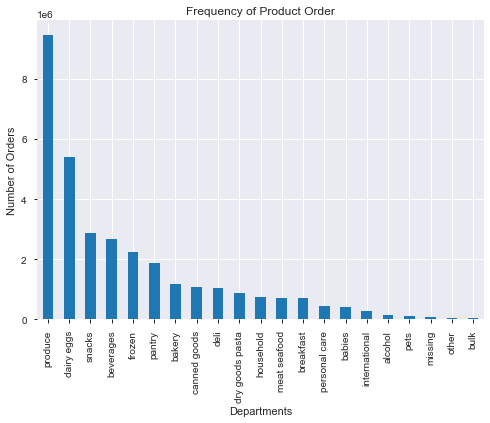

In [6]:
bar_dep = df['department'].value_counts().plot.bar()
plt.xlabel('Departments')
plt.ylabel('Number of Orders')
plt.title('Frequency of Product Order')

In [7]:
bar_dep.figure.savefig(r"C:\Users\drmat\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\bar_prod_ord.png")